In [91]:
!pip install -q gradio==3.50.2 gdown numpy datasets

In [92]:
from datasets import load_dataset

dataset = load_dataset("mnist")

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
import numpy as np

In [94]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [95]:
dataset['train'].features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], id=None)}

In [96]:
np.array(dataset['train'][0]['image']).shape

(28, 28)

In [97]:
from sklearn.preprocessing import OneHotEncoder

In [98]:
encoder = OneHotEncoder(sparse=False)


In [99]:
tf_train_dataset = dataset['train'].to_tf_dataset(shuffle=True,columns = ['image','label'],batch_size=16)
tf_test_dataset = dataset['test'].to_tf_dataset(shuffle=True,columns =['image','label'],batch_size=16)
X_test = np.array([np.array(img).reshape(28,28,1) for img in dataset['test'][:]['image']])
y_test = encoder.fit_transform(np.array(dataset['test'][:]['label']).reshape(-1,1))
X = np.array([np.array(img).reshape(28,28,1) for img in dataset['train'][:]['image']])
y = encoder.fit_transform(np.array(dataset['train'][:]['label']).reshape(-1,1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [57]:
# Create an instance of the ImageDataGenerator class for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,        # Random rotation up to 15 degrees
    width_shift_range=0.2,   # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    zoom_range=0.3          # Random zooming
)

In [102]:
for i in range(3):
  X_new = list(X)
  y_new = list(y)
  for xi,yi in zip(X,y):
    X_new.append(datagen.random_transform(xi))
    y_new.append(yi)
  X = np.array(X_new)
  y = np.array(y_new)

In [100]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

In [101]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [111]:
model.fit(x=X,y=y,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
15000/15000 [==============================] - 68s 5ms/step - loss: 0.1722 - accuracy: 0.9483 - val_loss: 0.0471 - val_accuracy: 0.9899
Epoch 2/5
15000/15000 [==============================] - 66s 4ms/step - loss: 0.1695 - accuracy: 0.9495 - val_loss: 0.0554 - val_accuracy: 0.9884
Epoch 3/5
15000/15000 [==============================] - 66s 4ms/step - loss: 0.1677 - accuracy: 0.9498 - val_loss: 0.0671 - val_accuracy: 0.9885
Epoch 4/5
15000/15000 [==============================] - 66s 4ms/step - loss: 0.1645 - accuracy: 0.9510 - val_loss: 0.0589 - val_accuracy: 0.9880
Epoch 5/5
15000/15000 [==============================] - 68s 5ms/step - loss: 0.1625 - accuracy: 0.9518 - val_loss: 0.0595 - val_accuracy: 0.9875


In [ ]:
X.shape,y.shape

((60000, 28, 28), (60000, 10))

In [87]:
def predict(img):
  try:
    img = np.array(img).reshape(1, 28, 28,1)
    out = model.predict(img)
    top5 = np.argsort(out[0])[::-1][:5]
    labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

    # Create a dictionary with label-probability pairs for the top 5 predictions
    probabilities = {labels[i]: float(out[0][i]) for i in top5}

    return probabilities
  except:
    return {"None":1.0}


In [88]:
predict(X_test[0])

1/1 [==============================] - 0s 145ms/step


{'seven': 1.0,
 'two': 3.438321849458248e-11,
 'three': 6.323086151893698e-12,
 'nine': 6.719040573216744e-15,
 'one': 3.798831065965618e-16}

In [ ]:
out = model.predict([X_test[0:1]])

1/1 [==============================] - 0s 19ms/step


In [ ]:
np.argsort(out[0])[::-1][:5]

array([7, 9, 5, 3, 0])

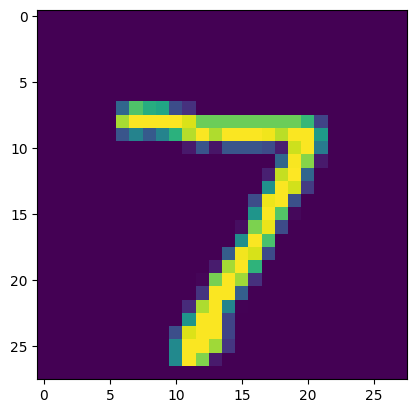

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0])

In [106]:
import gradio as gr

In [107]:
gr.Interface(fn=predict,
             inputs='sketchpad',
             outputs="label",
             live=True).launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://513931f1695c967605.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 20ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://513931f1695c967605.gradio.live


In [112]:
model.save('MNIST.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
